## プロビットモデルについて

プロビットモデル（Probit Model）は、特に二項ロジスティック回帰に似た形式の一般化線形モデルの一つで、二値データの解析に用いられます。プロビットモデルは、応答変数が0または1の離散値を取る場合に適用されます。主に、どのような要因がある事象の発生確率に影響を与えるかを調べるために使用されます。

### 基本的な概念

- **目的変数（応答変数）**: 二値（0または1）を取る変数
- **説明変数（独立変数）**: 応答変数に影響を与えると考えられる連続または離散変数

### プロビットモデルの数式

プロビットモデルでは、応答変数 $Y$ が1になる確率 $P(Y=1)$ を正規累積分布関数（CDF） $\Phi$ を使って次のように表します：

$$
P(Y=1 \mid X) = \Phi(X\beta)
$$

ここで、
- $X$ は説明変数のベクトル
- $\beta$ はパラメータのベクトル
- $\Phi$ は標準正規分布の累積分布関数

### プロビットモデルの利点
- **連続分布**: 正規分布を使用するため、連続的な確率を表現できます。
- **直感的解釈**: 正規分布に基づくため、パラメータの影響を直感的に理解しやすい。

### 実例
以下にPythonを使って、プロビットモデルを適用する例を示します。ここでは、`statsmodels`ライブラリを使用します。



### コードの説明
1. **データの作成**: 正規分布に従う説明変数を生成し、標準正規分布の累積分布関数（CDF）を用いて確率を計算します。その確率に基づいて二値データを生成します。
2. **プロビットモデルのフィッティング**: `statsmodels`の`Probit`クラスを使用してプロビットモデルを適用し、モデルをフィッティングします。
3. **結果の表示**: モデルの結果を表示します。
4. **予測値の計算とプロット**: フィッティングされたモデルを使って予測値を計算し、データと共にプロットします。

プロビットモデルは、二値データの解析において非常に有用なツールであり、特に正規分布に基づくアプローチを好む場合に適しています。

Optimization terminated successfully.
         Current function value: 0.481461
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                         Probit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Jul 2024   Pseudo R-squ.:                  0.2750
Time:                        21:33:35   Log-Likelihood:                -48.146
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 1.511e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5229      0.156      3.356      0.001       0.218       0.828
x1             1.0981      0.

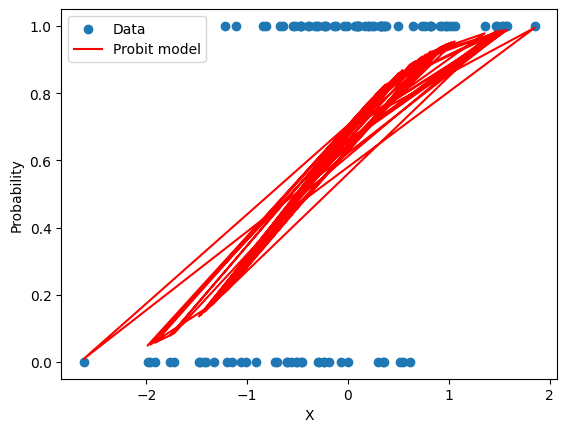

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

# サンプルデータの作成
np.random.seed(42)
n = 100
X = np.random.normal(size=n)
X = sm.add_constant(X)
beta = [0.5, 1.0]
linear_combination = np.dot(X, beta)
probabilities = norm.cdf(linear_combination)
y = np.random.binomial(1, probabilities)

# プロビットモデルのフィッティング
probit_model = sm.Probit(y, X)
probit_result = probit_model.fit()

# 結果の表示
print(probit_result.summary())

# 予測値の計算
y_pred = probit_result.predict(X)

# プロット
plt.scatter(X[:, 1], y, label="Data")
plt.plot(X[:, 1], y_pred, color='red', label="Probit model")
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.show()


## プロビットモデルとロジスティック回帰の違い

プロビットモデルとロジスティック回帰は、どちらも二値応答変数を扱うための一般化線形モデルですが、それぞれ異なる累積分布関数（CDF）を使用している点で異なります。

### 主な違い

1. **累積分布関数（CDF）**:
    - **プロビットモデル**:
        - 正規分布の累積分布関数（CDF）を使用します。
        - 数式: $$ P(Y=1 \mid X) = \Phi(X\beta) $$
        - ここで、$\Phi$ は標準正規分布のCDFです。

    - **ロジスティック回帰**:
        - ロジスティック関数（シグモイド関数）を使用します。
        - 数式: $$ P(Y=1 \mid X) = \frac{1}{1 + \exp(-X\beta)} $$

2. **誤差分布**:
    - **プロビットモデル**:
        - 標準正規分布に従う誤差を仮定します。
    
    - **ロジスティック回帰**:
        - 標準ロジスティック分布に従う誤差を仮定します。

3. **計算の容易さ**:
    - **プロビットモデル**:
        - 正規分布の累積分布関数の計算が必要なため、若干計算が複雑です。
    
    - **ロジスティック回帰**:
        - ロジスティック関数は計算が比較的容易です。

4. **適用範囲**:
    - **プロビットモデル**:
        - 経済学や生物統計学でよく使用されます。
    
    - **ロジスティック回帰**:
        - 医学、社会科学、マーケティングなど、広範な分野で使用されます。

### 実例の比較

以下にPythonを使って、同じデータセットに対してプロビットモデルとロジスティック回帰を適用する例を示します。


### コードの説明
1. **データの作成**: 正規分布に従う説明変数を生成し、標準正規分布の累積分布関数（CDF）を用いて確率を計算します。その確率に基づいて二値データを生成します。
2. **プロビットモデルのフィッティング**: `statsmodels`の`Probit`クラスを使用してプロビットモデルを適用し、モデルをフィッティングします。
3. **ロジスティック回帰のフィッティング**: `statsmodels`の`Logit`クラスを使用してロジスティック回帰を適用し、モデルをフィッティングします。
4. **結果の表示**: それぞれのモデルの結果を表示します。
5. **予測値の計算とプロット**: フィッティングされたモデルを使って予測値を計算し、データと共にプロットします。

プロビットモデルとロジスティック回帰は、それぞれ異なる累積分布関数を使用するため、データの分布や分析の目的に応じて使い分けることが重要です。

Optimization terminated successfully.
         Current function value: 0.481461
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.483443
         Iterations 6
Probit Model Summary:
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                         Probit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Jul 2024   Pseudo R-squ.:                  0.2750
Time:                        21:36:18   Log-Likelihood:                -48.146
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 1.511e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

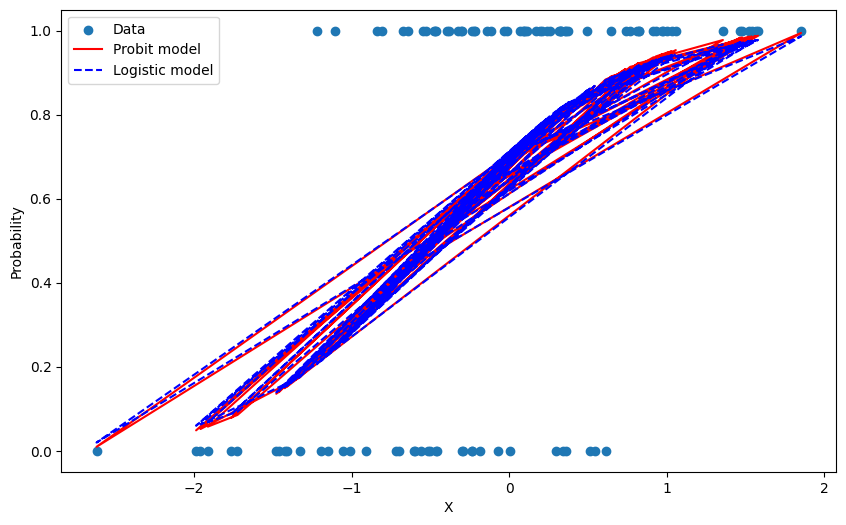

In [5]:

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

# サンプルデータの作成
np.random.seed(42)
n = 100
X = np.random.normal(size=n)
X = sm.add_constant(X)
beta = [0.5, 1.0]
linear_combination = np.dot(X, beta)
probabilities = norm.cdf(linear_combination)
y = np.random.binomial(1, probabilities)

# プロビットモデルのフィッティング
probit_model = sm.Probit(y, X)
probit_result = probit_model.fit()

# ロジスティック回帰のフィッティング
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()

# 結果の表示
print("Probit Model Summary:")
print(probit_result.summary())
print("\nLogistic Regression Summary:")
print(logit_result.summary())

# 予測値の計算
y_pred_probit = probit_result.predict(X)
y_pred_logit = logit_result.predict(X)

# プロット
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, label="Data")
plt.plot(X[:, 1], y_pred_probit, color='red', label="Probit model")
plt.plot(X[:, 1], y_pred_logit, color='blue', linestyle='--', label="Logistic model")
plt.xlabel("X")
plt.ylabel("Probability")
plt.legend()
plt.show()